In [19]:
import pandas as pd
customer_data=pd.read_csv('Mall_Customers.csv')
customer_data_df=customer_data.iloc[:,3:]

In [20]:
customer_data_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

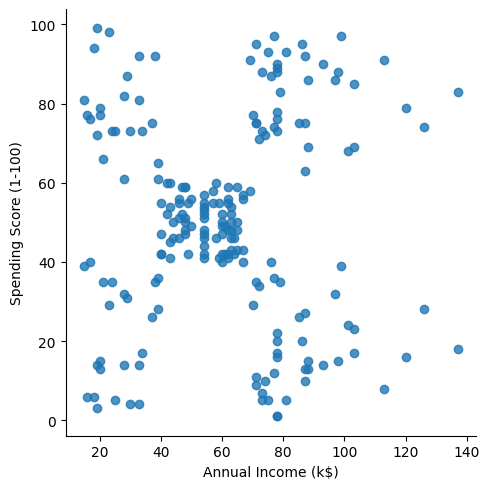

In [22]:
sn.lmplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=customer_data_df,fit_reg=False,height=5)

In [23]:
from sklearn.cluster import KMeans
x=customer_data_df[['Annual Income (k$)','Spending Score (1-100)']]
clusters=KMeans(3)
clusters.fit(x)

KMeans(n_clusters=3)

In [24]:
customer_data_df["clusterid"]=clusters.labels_

In [25]:
customer_data_df[0:5]

,Annual Income (k$),Spending Score (1-100),clusterid
0,15,39,2
1,15,81,2
2,16,6,2
3,16,77,2
4,17,40,2


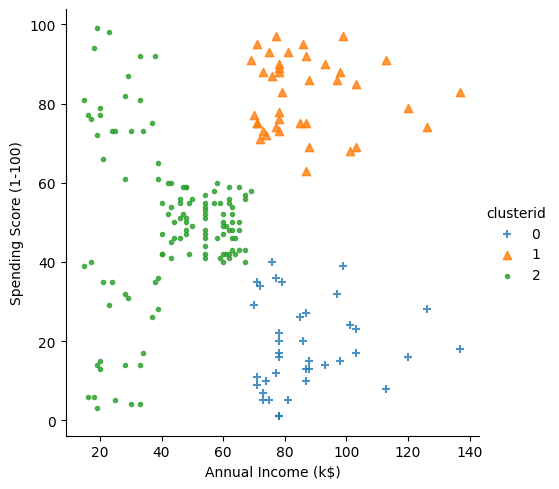

In [26]:
markers=['+','^','.']
sn.lmplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=customer_data_df,fit_reg=False,height=5,hue="clusterid",markers=markers)

In [29]:
#to standarize the features and decrease the impact of the one features more on model training
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_customer_df=scaler.fit_transform(customer_data_df[['Annual Income (k$)','Spending Score (1-100)']])
scaled_customer_df[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [30]:
from sklearn.cluster import KMeans
clusters_new=KMeans(3,random_state=42)
clusters_new.fit(scaled_customer_df)
customer_data_df["clusterid_new"]=clusters_new.labels_

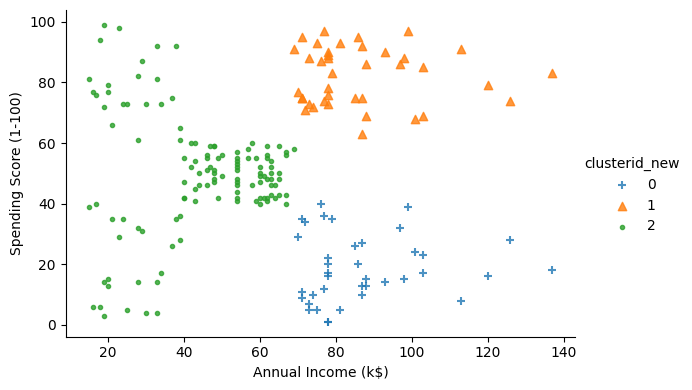

In [37]:
markers=['+','^','.']
sn.lmplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=customer_data_df,hue="clusterid_new",fit_reg=False,markers=markers,height=4,aspect=1.5)